In [3]:
import numpy as np
import sympy as sp
import math as m
import matplotlib.pyplot as plt

In [64]:
#puntos = puntos a  grafifcar
#f = funcion a graficar 
def grafico(puntos_x,puntos_y,f,tituloGrafico:str):
    PUNTO_X_MAX =  max(puntos_x)
    PUNTO_X_MIN = min(puntos_x)
    DOMINIO = 5
    #genero datos para el dominio de x
    x_values = np.arange(PUNTO_X_MIN-DOMINIO,DOMINIO+PUNTO_X_MAX,step=0.01)
    #genero datos para la imagen de y
    y_values = ([f(x) for x in x_values])
    #ploteo el grafico
    plt.plot(x_values,y_values)
    # Agregar el eje de abscisas
    plt.axhline(y=0, color='black', linestyle='--')
    # Agregar el eje de ordenadas
    plt.axvline(x=0, color='black', linestyle='--')
    #agrego puntos calulados 
    plt.scatter(puntos_x,puntos_y,c="red")
    #agrego labels
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(tituloGrafico)
    PUNTOS_Y_MIN = min(puntos_y)
    PUNTOS_Y_MAX = max(puntos_y)
    plt.ylim(PUNTOS_Y_MIN-DOMINIO,PUNTOS_Y_MAX+DOMINIO)
    #muestro el grafico
    plt.show()

In [5]:
def decimal_truncate(numero, decimales):
    if (decimales < 0): raise Exception("el N° de decimales a truncar debe ser positivo")
    factor = 10.0 ** decimales
    return m.trunc(numero * factor) / factor


In [6]:
#funcion que ingresa los decimales exactos
def decExactos_a_tolerancia(exactitud):
    if (exactitud < 0): raise Exception("La exactitud debe ser positiva o 0")
    #scamos el valor de paradad dada la exactitud
    tolerancia = "0."
    #agregamos tantos 0 como exactitud indicada
    for i in range(exactitud): tolerancia += "0"
    #agregamos un uno para indicar que es una fraccion
    tolerancia += "1"
    #convertimos a flotante para poder operar
    return float(tolerancia)
"""
    x: recibe un valor cercano a la raiz que se busca aproximar
    tolerancia: 0 < Numero < 1 que indica el intervalo de corte de la funcion ej: 0.0001 (como minimo3 deciamles exactos)
    f: funcion de tipo numerica
"""
def aproximar_raiz_newton_secante(x,tolerancia,f):
    symbol = sp.symbols("x")
    #instanciamos derivada de la funcion
    f1 = sp.lambdify(symbol,sp.diff(f(symbol)),np)
    #anidamos funcion para poder utilizar variables no locales
    def secante():
        try:
            return x1 - ((f(x1)*(x1-x))/(f(x1)-f(x)))
        except ZeroDivisionError:
            print(f"error: f({x}) = 0, no se puede dividir por 0")
            exit(6)
    #------------------------- fin secante ----------------------------------    
    while(True):    
        try:
            x1 = x - (f(x)/f1(x))
        except ZeroDivisionError:
            print(f"error: f'({x}) = 0, no se puede dividir por 0")
            exit(6)
        if (abs(x-x1) <= tolerancia):
            break
        x = secante()
    return (x1)

In [7]:
def productoria(points, step, txt=False, **kwargs):
    x =  kwargs['x'] if 'x' in kwargs else points[step][0]
    evaluado = 1
    noEvaluado = ""
    for i in range(step):
        noEvaluado += f'*(x-{points[i][0]})'
        evaluado *= (x - points[i][0])
    return evaluado if not txt else noEvaluado   

In [8]:
def alphas(points:list):
    alphaList = [] 
    
    def prevAlphas(p):
        acum = 0
        for i in range(len(alphaList)):
            acum += alphaList[i] if i < 1 else alphaList[i]*productoria(points,i,x=p)
        return acum

    for i,p in enumerate(points):           
        alpha = (points[i][1]-(prevAlphas(p[0]) if i>0 else 0))/productoria(points, i) 
        alphaList.append(alpha)
       
    return alphaList

In [22]:
def nEquation(points, **kwargs):
    pn =  kwargs['pn'] if 'pn' in kwargs else len(points)
    x = sp.symbols('x')
    equations = []
    alphaList = alphas(points)
    equation = f'{alphaList[0]}'

    for i in range(pn):
        if i > 0:
            equation += f'{"+" if alphaList[i] > 0 else ""}{alphaList[i]}{productoria(points,i,True)}'
    return sp.lambdify(x,equation,np)

In [10]:
def validarNum(txt:str, nat=False, **kwargs):
    min =  kwargs['min'] if 'min' in kwargs else None
    while True:
        val = input(txt)  
        try:
            val = float(val)
            if val.is_integer():
                val = int(val)
            if (min and val < min):
                raise Exception(f"Error: El número debe ser mayor de {min}") 
            if (nat and (val <= 0)):
                raise Exception("Error: Se esperaba un número mayor a 0")                
            return val
        except ValueError:
            print("Error: Se esperaba un valor numérico válido.") 
        except Exception as e:
            print(e)             

In [11]:
def choice(txt:str):
    ch = str(input(txt))
    while(ch.lower() != 's' and ch.lower() != 'n'):
        print(f'Se esperaba S/N pero se obtubo {ch}.')
        ch = str(input(txt))
    return True if ch.lower() == 's' else False

In [125]:
class Puntos:
    def __init__(self, manualStep=False):
        self.steps = int(validarNum('Ingrese la cantidad de puntos:',True)) if manualStep else 20
        self.XN = np.array([])
        self.YN = np.array([])
    
    def generar(self):
        for i in range(self.steps):
            self.XN = np.append(self.XN, validarNum(f'Ingrese el valor para X{i}'))
            self.YN = np.append(self.YN, validarNum(f'Ingrese el valor para Y{i}'))

    def obtenerPuntos(self):
        self.generar()
        return [(x,y) for x,y in zip(self.XN, self.YN)]

class PuntosAleatorios(Puntos):
    def __init__(self, X_Equal_Y, manualStep=False):
        Puntos.__init__(self, manualStep)   
        self.x_min = validarNum('Ingrese la cota menor para x:')
        self.x_max = validarNum('Ingrese la cota mayor para x:',min=self.x_min)
        self.y_min = self.x_min
        self.y_max = self.x_max
        if not X_Equal_Y:
            self.y_min = validarNum('Ingrese la cota inferior para y:')
            self.y_max = validarNum('Ingrese la cota superior para y:',min=self.y_min)
        
    def generar(self):
        #Genera arrays con numeros aleatorios y diferentes entre si
        self.YN = np.random.choice(np.round(np.random.uniform(self.y_min, self.y_max, size = self.steps),3), size=self.steps, replace=False)
        self.XN = np.random.choice(np.round(np.random.uniform(self.x_min, self.x_max, size = self.steps),3), size=self.steps, replace=False)

In [109]:
#cantPuntos = cantidad de puntos que se usaron para generar el polinomio
#funcNewton = polinomio de newton numerico
def testeoGrado(cantPuntos:int,FuncNewton):
    GRADO_TEORICO = cantPuntos-1
    x = sp.symbols("x")
    f_simbolic = sp.simplify(FuncNewton(x))
    GRADO_POLINOMIO = sp.degree(f_simbolic)
    if (GRADO_POLINOMIO != GRADO_TEORICO): raise Exception(f"error: el grado del polinomio ({GRADO_POLINOMIO}) debe ser igual al grado teorico ({GRADO_TEORICO})")
    print(f"El grado del polinomio ({GRADO_POLINOMIO}) es igual al grado teorico (cantPuntos-1 = {GRADO_TEORICO}) ")
    

In [118]:
xd = np.random.choice(np.round(np.random.uniform(-10, 30, size=100),3), size=20, replace=False)
yd = np.random.choice(np.round(np.random.uniform(-10, 30, size=100),3), size=20, replace=False)

[(x,y) for x,y in zip(xd, yd)]

[(-7.661, 10.38),
 (16.007, 6.965),
 (9.362, 14.261),
 (24.947, 23.752),
 (22.589, -2.131),
 (21.339, 26.183),
 (26.345, 14.292),
 (7.535, 25.041),
 (27.543, 8.005),
 (-4.317, 18.361),
 (11.159, 19.237),
 (-4.058, 27.218),
 (9.633, 8.681),
 (-1.861, -0.437),
 (18.859, -0.042),
 (6.375, 19.961),
 (-4.848, -9.787),
 (24.113, 20.233),
 (29.845, -8.159),
 (-9.375, -6.653)]

[(0.497, 0.27), (0.221, 0.429), (0.634, 0.952), (0.34, 0.132), (0.417, 0.331), (0.316, 0.323), (0.897, 0.961), (0.307, 0.511), (0.875, 0.921), (0.611, 0.639), (0.864, 0.077), (0.166, 0.068), (0.488, 0.454), (0.27, 0.409), (0.74, 0.277), (0.87, 0.449), (0.78, 0.542), (0.788, 0.611), (0.942, 0.865), (0.174, 0.664)]




puntos generados ordenados segun x de menor a mayor:
[(0.166, 0.068), (0.174, 0.664), (0.221, 0.429), (0.27, 0.409), (0.307, 0.511), (0.316, 0.323), (0.34, 0.132), (0.417, 0.331), (0.488, 0.454), (0.497, 0.27), (0.611, 0.639), (0.634, 0.952), (0.74, 0.277), (0.78, 0.542), (0.788, 0.611), (0.864, 0.077), (0.87, 0.449), (0.875, 0.921), (0.897, 0.961), (0.942, 0.865)]




Polinomio generado:
4621988214755.86*x**19 - 45317816139016.1*x**18 + 206571706790626.0*x**17 - 580979066184281.0*x**16 + 1.12819364737293e+15*x**15 - 1.60356473438062e+15*x**14 + 1.7251224746202e+15*x**13 - 1.43206127817931e+15*x**12 + 926041536104378.0*x**11 - 467003540190293.0*x**10 + 182190883472783.0*x*

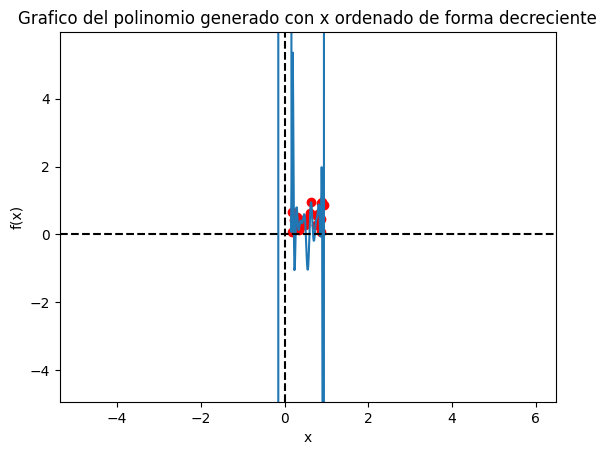

In [128]:
def saltosDeLinea(cantSaltos):
    for i in range(cantSaltos): print("\n")
def main():
    try:
        #funcion de ingreso de datos
        #lista_puntos = Puntos().obtenerPuntos() if choice("Desea ingresar los puntos manualmente? S/N") else PuntosAleatorios(choice('Limites de x e y iguales? S/N')).obtenerPuntos()
        CANT_PUNTOS = 20
        puntos_x = np.random.choice(np.round(np.random.uniform(-10, 30, size=100),3), size=CANT_PUNTOS, replace=False)
        puntos_y = np.random.choice(np.round(np.random.uniform(-20, 40, size=100),3), size=CANT_PUNTOS, replace=False)
        lista_puntos = [(x,y) for x,y in zip(puntos_x, puntos_y)]
        print (lista_puntos)##DEBUG##################
        lista_puntos_asc = sorted(lista_puntos, key=lambda x: x[0])
        lista_puntos_desc = sorted(lista_puntos, key=lambda x: x[0], reverse=True)
        saltosDeLinea(2)
        print("puntos generados ordenados segun x de menor a mayor:")
        print(lista_puntos_asc)
    except Exception:
        print('La creación de la lista de puntos falló.')
    ##calulo de polinomio generado por puntos ordenados segun x de forma de decreciente
    saltosDeLinea(2)
    poli_newton_desc = nEquation(lista_puntos_asc)
    symbol = sp.symbols("x")
    print("Polinomio generado:")
    print(sp.simplify(poli_newton_desc(symbol)))
    ##Testeo de grado del polinomio ordenado por x
    saltosDeLinea(1)
    testeoGrado(cantPuntos=len(lista_puntos_asc),FuncNewton=poli_newton_desc)
    #grafico de la funcion con sus respectivos puntos
    saltosDeLinea(2)
    PUNTOS_X_ASC =[punto[0] for punto in lista_puntos_asc]
    PUNTOS_Y_ASC = [punto[1] for punto in lista_puntos_asc]
    ##DEBUG###################
    print("puntos generados aleatoriamente en y")
    print(PUNTOS_Y_ASC)
    print ("puntos en y generados con f(puntos generados aleatoreamente en  x) ")
    print(f"{[poli_newton_desc(x) for x in PUNTOS_X_ASC]}") 
    #######################
    grafico(PUNTOS_X_ASC,PUNTOS_Y_ASC,poli_newton_desc,"Grafico del polinomio generado con x ordenado de forma decreciente")
main()
        